# Sponsorships on YouTube Videos

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import dask.dataframe as dd

plt.style.use("ggplot")

## Quick analysis of the channels

In [19]:
# Read the data containing the information about the channels
df = dd.read_csv("data/_raw_df_channels.tsv", sep='\t')

# Convert to pandas
df = df.compute()

In [21]:
df.head(10)

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb
0,Film and Animation,2017-05-21,UCBJuEqXfXTdcPSbGO9qqn1g,MagnusNation,65100,28,231223.0
1,Entertainment,2011-12-13,UCkNW9Q1VR_aeZ6uht83jJVQ,Mago Dario Animazion...,60200,48,238538.0
2,Music,2008-03-17,UCXhkGgooXHDNwgJXmoTSN7g,Mago Merlino,14800,838,707828.0
3,Entertainment,2014-10-19,UCvZGsuvKlYOGiZTsxwJNS5Q,MAGO TOMÁS,26200,31,424550.0
4,Comedy,2017-01-15,UCxJWPpPED-J24znoKyKZYjg,Magog of Morskar,29400,158,422966.0
5,Gaming,2017-05-06,UCNNLaOkE-rcthxNssSHET2A,magoogala gaming,113000,106,148377.0
6,Film and Animation,2013-12-17,UCISF5OGuAtSLNF24TKTnXag,Magpiepony,736000,304,21120.0
7,Science & Technology,2007-02-24,UCRmRfTjSmzD1FQn3Iwp2fiQ,Magpul,86600,204,172090.0
8,Music,2011-05-28,UC1WpidoYChUGcyHAcnALQIg,magrosi65,64900,1497,219166.0
9,Music,2015-08-11,UCLVAbmicv2u1x7fgO4fLbng,Mags Lyrics,10700,66,884480.0


In [17]:
df.describe()

,subscribers_cc,videos_cc,subscriber_rank_sb
count,1.569770e+05,156977.000000,1.533300e+05
mean,2.415465e+05,700.634354,3.573119e+05
std,1.110144e+06,4439.410641,2.709194e+05
min,1.000000e+04,10.000000,3.000000e+00
25%,1.880000e+04,69.000000,1.165692e+05
50%,4.210000e+04,173.000000,3.025270e+05
75%,1.360000e+05,440.000000,5.707568e+05
max,1.121395e+08,461923.000000,1.101245e+06


### Number of subscribers per channel category

In [28]:
df_channels = df.copy()
df_channels = df_channels.sort_values(ascending=False, by='subscribers_cc')
df_channels

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb
29058,Music,2006-03-13,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,112139463,13839,102.0
16032,Gaming,2010-04-29,UC-lHJZR3Gqxm24_Vd_AJ5Yw,PewDiePie,101000000,3956,3.0
43231,Howto & Style,2016-11-15,UC295-Dw_tDNtZXFeAPAW6Aw,5-Minute Crafts,60600000,3591,9.0
35502,Education,2006-09-01,UCbCmjCuTUZos6Inko4u57UQ,Cocomelon - Nursery ...,60100000,458,7.0
40878,Entertainment,2006-09-20,UCpEhnqL0y41EpW2TvWAHD7Q,SET India,56018869,32661,8.0
...,...,...,...,...,...,...,...
91381,Music,2015-09-23,UClDz-smIzu7fZGe-ht5JPbw,Sleep Waker,10000,15,942145.0
120709,Education,2006-06-21,UCNTBvSRxlYRznBpYPmjNbmQ,hasan milani,10000,2022,922280.0
137568,Gaming,2013-04-21,UCf7JyIpIcUKhtBaZBYEuiVQ,NANDO,10000,156,987127.0
114977,Entertainment,2014-01-18,UCXDWPZWBwjxvYpM-7sZT73g,KiddBandino,10000,19,897816.0


Text(0, 0.5, 'Channel category')

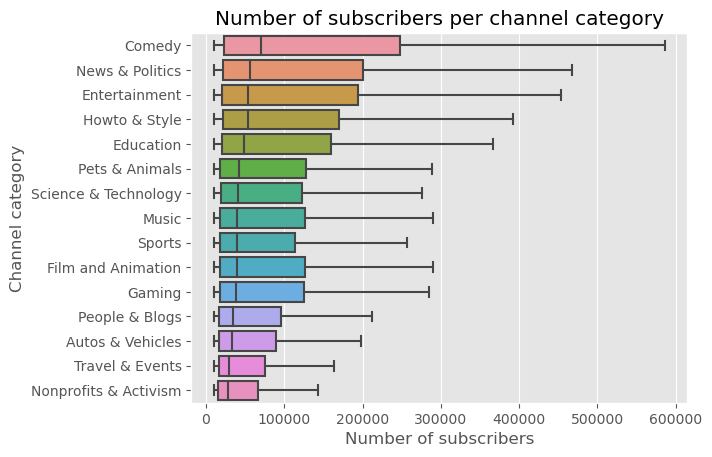

In [31]:
# Order the channels by the number of subscribers per category
grouped = df.loc[:,['category_cc', 'subscribers_cc']] \
    .groupby('category_cc') \
    .median() \
    .sort_values(by='subscribers_cc', ascending=False)

# Plot the categories
sns.boxplot(data=df, x=df.subscribers_cc, y=df.category_cc, order=grouped.index, showfliers = False)
plt.title('Number of subscribers per channel category')
plt.xlabel('Number of subscribers')
plt.ylabel('Channel category')

In [7]:
df.groupby("category_cc").max("subscriber_cc")

,subscribers_cc,videos_cc,subscriber_rank_sb
category_cc,,,
Autos & Vehicles,8271583,82914,985789.0
Comedy,26400000,34405,998847.0
Education,60100000,118159,988795.0
Entertainment,56018869,257188,1007560.0
Film and Animation,29500000,125613,1007876.0
Gaming,101000000,169676,1009505.0
Howto & Style,60600000,332703,1005013.0
Music,112139463,175300,1101245.0
News & Politics,16274836,461923,983725.0


### Channel with most subscribers

In [8]:
df.loc[df['subscribers_cc'].idxmax()]

category_cc                         Music
join_date             2006-03-13 00:00:00
name_cc                          T-Series
subscribers_cc                  112139463
videos_cc                           13839
subscriber_rank_sb                  102.0
Name: UCq-Fj5jknLsUf-MWSy4_brA, dtype: object

### Channel with most videos

In [9]:
df.loc[df['videos_cc'].idxmax()]

category_cc               News & Politics
join_date             2015-06-17 00:00:00
name_cc                        AP Archive
subscribers_cc                    1770000
videos_cc                          461923
subscriber_rank_sb                 6059.0
Name: UCHTK-2W11Vh1V4uwofOfR4w, dtype: object